In [ ]:
# use this code to connect to google drive  fromm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,

resulting in 30 features. For instance, field 3 is Mean Radius, field

13 is Radius SE, field 23 is Worst Radius.


All feature values are recoded with four significant digits.


Missing attribute values: none


Class distribution: 357 benign, 212 malignant

Dataset
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


**Libraries**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn import tree
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import joblib

**Load Data**

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/new projects ai /breast cancer/data.csv')

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df_test = df.drop(['Unnamed: 32','id'],axis=1)

In [ ]:
df_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the gender column
le.fit(df_test['diagnosis'])

# Transform the gender column to numerical labels
df_test['diagnosis_labels'] = le.transform(df_test['diagnosis'])


diagnosis (M : 1)  (B:0)

In [ ]:
df_test = df_test.drop(['diagnosis'],axis=1)


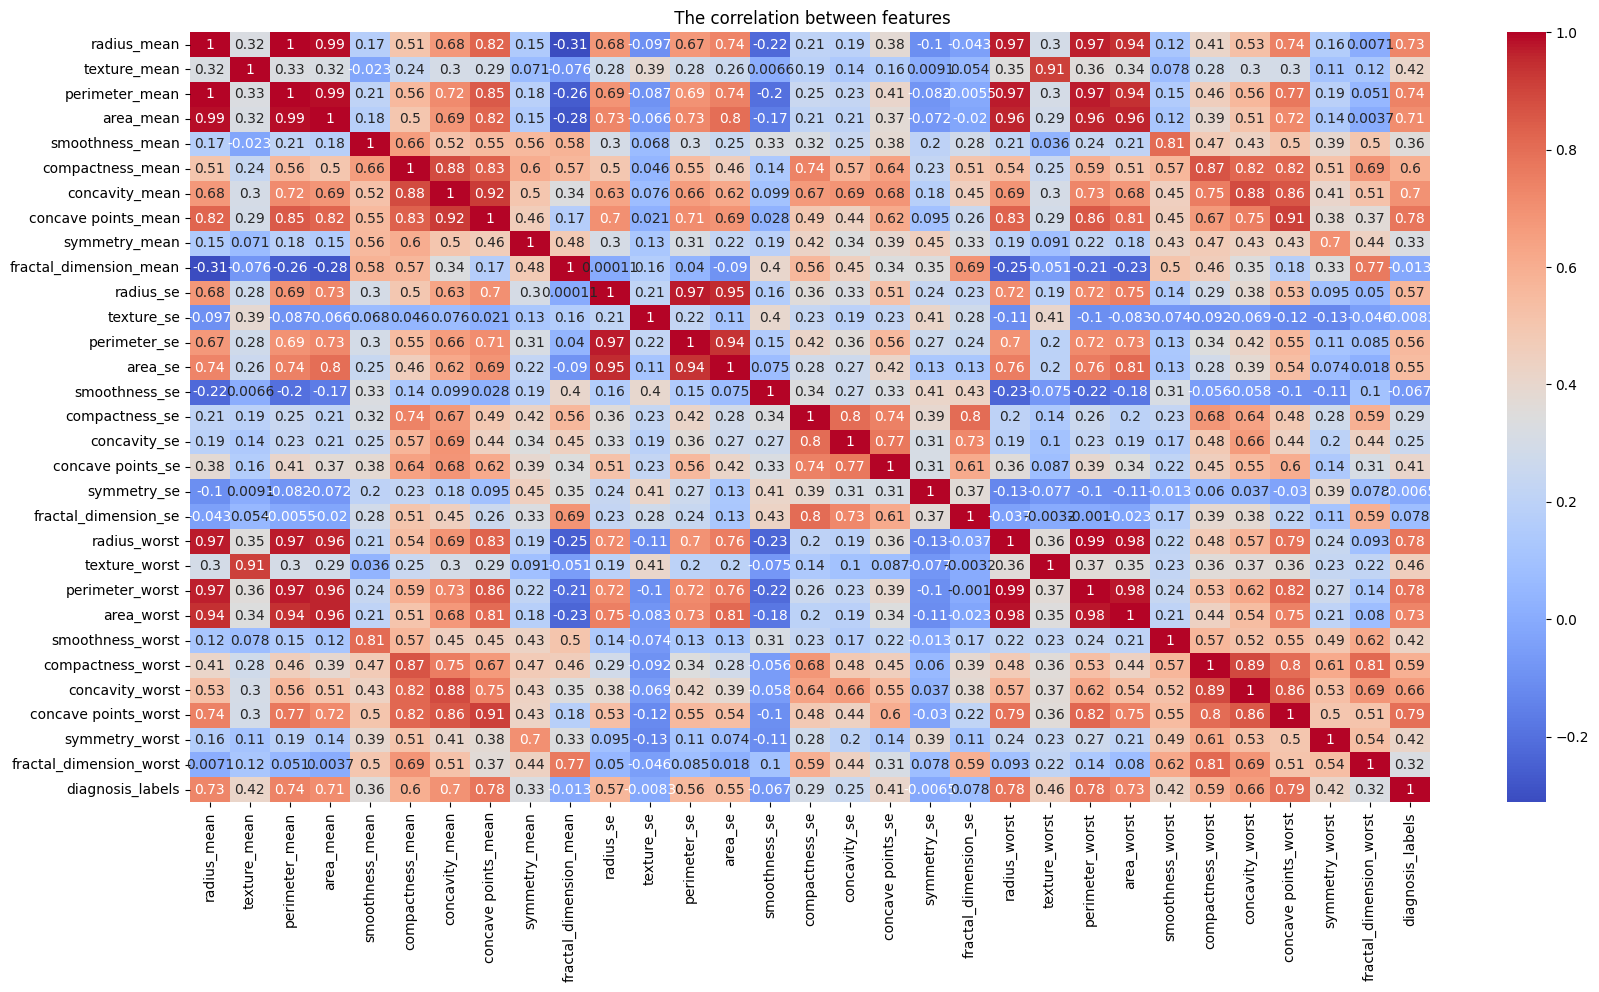

In [ ]:
# corr between features
plt.figure(figsize=(20, 10))

sns.heatmap(df_test.corr(),annot=True, cmap='coolwarm')
plt.title(" The correlation between features")
plt.show()

**Data Split**

In [ ]:
# data split
x= df_test.drop(['diagnosis_labels'],axis=1)

y= df_test['diagnosis_labels']

In [ ]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=.20, random_state=0)

**Build Model**

In [ ]:
# models

models = {

    "svc":svm.SVC(),
    "knn" :KNeighborsClassifier(2),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=10,criterion="entropy"),
    "XGB": XGBClassifier(),
    "svc1":svm.SVC(kernel="linear"),
    "Gauss":GaussianProcessClassifier(1.0 * RBF(1.0)),
    "MLP":MLPClassifier(alpha=1.1, max_iter=1000),
    "ADA":AdaBoostClassifier(),
    "Gaussian":GaussianNB(),
    "QDA":QuadraticDiscriminantAnalysis()
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred,average="macro")}')
    print(f'Testing Precesion: {precision_score(y_test, y_pred,average="macro")}')
    print(f'Testing F1 score :{f1_score(y_test, y_pred, average="macro")}')
    print('-'*30)

Training Model svc 
--------------
Training Accuracy: 0.9098901098901099
Testing Accuracy: 0.9298245614035088
Testing Confusion Matrix: 
[[66  1]
 [ 7 40]]
Testing Recall: 0.9180692283264529
Testing Precesion: 0.9398596725693285
Testing F1 score :0.925974025974026
------------------------------
Training Model knn 
--------------
Training Accuracy: 0.9472527472527472
Testing Accuracy: 0.9298245614035088
Testing Confusion Matrix: 
[[66  1]
 [ 7 40]]
Testing Recall: 0.9180692283264529
Testing Precesion: 0.9398596725693285
Testing F1 score :0.925974025974026
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9122807017543859
Testing Confusion Matrix: 
[[60  7]
 [ 3 44]]
Testing Recall: 0.9158463004128294
Testing Precesion: 0.907563025210084
Testing F1 score :0.9105180533751962
------------------------------
Training Model RF 
--------------
Training Accuracy: 0.9978021978021978
Testing Accuracy: 0.9473684210526315
Testing Confusion M

In [ ]:

models = {

    "RF": RandomForestClassifier(n_estimators=10,criterion="entropy"),
    "XGB": XGBClassifier(),
    "svc1":svm.SVC(kernel="linear"),
    "ADA":AdaBoostClassifier(),
    "QDA":QuadraticDiscriminantAnalysis()
}

In [ ]:
y_pred=[]
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred.append(model.predict(x_test))

    print('-'*30)

Training Model RF 
--------------
------------------------------
Training Model XGB 
--------------
------------------------------
Training Model svc1 
--------------
------------------------------
Training Model ADA 
--------------
------------------------------
Training Model QDA 
--------------
------------------------------


In [ ]:
# mix predict between models

y_mix =[]
for index in range (0,114 ):
    count_0=0
    count_1= 0
    for array in range(0,5) :
      if y_pred[array][index]==0:
        count_0 +=1
      if y_pred[array][index]==1:
        count_1 +=1
    if count_0 >count_1 :
      y_mix.append(0)
    if count_1>count_0 :
      y_mix.append(1)

**Test**

In [ ]:
print(f'Testing Accuracy: {accuracy_score(y_test, y_mix)}')


Testing Accuracy: 0.9824561403508771


**Save Model**

In [ ]:
#save model
model=XGBClassifier()
model = model.fit(x_train, y_train)
filename = "breast cancer_Xgb.joblib"
joblib.dump(model, filename)

['breast cancer_Xgb.joblib']